To explore the relationship between India’s import levels and the INR/USD exchange rate, a scatter plot and regression analysis were conducted using historical data. The scatter plot visualizes how imports (in USD) vary with changing exchange rates over time. A regression line was added to highlight the overall trend. Surprisingly, the analysis indicates a positive correlation, suggesting that India’s imports have increased even as the Indian Rupee weakened.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/global-economy-indicators")

print("Path to dataset files:", path)


100%|██████████| 1.08M/1.08M [00:00<00:00, 22.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/global-economy-indicators/versions/4


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Global Economy Indicators.csv to Global Economy Indicators.csv


In [3]:
import pandas as pd

df = pd.read_csv('Global Economy Indicators.csv')
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [4]:
df.shape

(10512, 26)

In [5]:
df.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [7]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


In [8]:
df.isnull().sum()

,0
CountryID,0
Country,0
Year,0
AMA exchange rate,0
IMF based exchange rate,0
Population,0
Currency,0
Per capita GNI,0
"Agriculture, hunting, forestry, fishing (ISIC A-B)",121
Changes in inventories,1841


In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

,0
CountryID,0
Country,0
Year,0
AMA exchange rate,0
IMF based exchange rate,0
Population,0
Currency,0
Per capita GNI,0
"Agriculture, hunting, forestry, fishing (ISIC A-B)",0
Changes in inventories,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
52,8,Albania,1970,5.0,5.0,2324731,Lek,975,864793402.0,57793232.0,...,1.312561e+09,504595820.0,394647786.0,794665515.0,188952171.0,2.345798e+09,45739633.0,212298036.0,2.267360e+09,2.265577e+09
53,8,Albania,1971,5.0,5.0,2389812,Lek,976,889758995.0,59074883.0,...,1.350287e+09,519031885.0,406050295.0,817625694.0,194253684.0,2.413182e+09,47022973.0,218254570.0,2.332419e+09,2.330585e+09
54,8,Albania,1972,5.0,5.0,2455171,Lek,977,915350702.0,60818843.0,...,1.389164e+09,533991647.0,417663130.0,841009277.0,199867591.0,2.482484e+09,48381941.0,224562082.0,2.399403e+09,2.397526e+09
55,8,Albania,1973,5.0,5.0,2520436,Lek,979,941147592.0,63668482.0,...,1.428760e+09,549392880.0,429539992.0,864924791.0,205932186.0,2.553736e+09,49849969.0,231376034.0,2.468450e+09,2.466543e+09
56,8,Albania,1974,5.0,5.0,2585452,Lek,982,969063811.0,63077388.0,...,1.470097e+09,564865686.0,442272785.0,890563577.0,211067032.0,2.627172e+09,51092986.0,237145264.0,2.539022e+09,2.537016e+09


In [13]:
print(df.columns.tolist())

[' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ', ' IMF based exchange rate ', ' Population ', ' Currency ', ' Per capita GNI ', ' Agriculture, hunting, forestry, fishing (ISIC A-B) ', ' Changes in inventories ', ' Construction (ISIC F) ', ' Exports of goods and services ', ' Final consumption expenditure ', ' General government final consumption expenditure ', ' Gross capital formation ', ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ', ' Household consumption expenditure (including Non-profit institutions serving households) ', ' Imports of goods and services ', ' Manufacturing (ISIC D) ', ' Mining, Manufacturing, Utilities (ISIC C-E) ', ' Other Activities (ISIC J-P) ', ' Total Value Added ', ' Transport, storage and communication (ISIC I) ', ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ', ' Gross National Income(GNI) in USD ', ' Gross Domestic Product (GDP) ']


In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [15]:
print(df.columns.tolist())

['countryid', 'country', 'year', 'ama_exchange_rate', 'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni', 'agriculture,_hunting,_forestry,_fishing_(isic_a-b)', 'changes_in_inventories', 'construction_(isic_f)', 'exports_of_goods_and_services', 'final_consumption_expenditure', 'general_government_final_consumption_expenditure', 'gross_capital_formation', 'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)', 'household_consumption_expenditure_(including_non-profit_institutions_serving_households)', 'imports_of_goods_and_services', 'manufacturing_(isic_d)', 'mining,_manufacturing,_utilities_(isic_c-e)', 'other_activities_(isic_j-p)', 'total_value_added', 'transport,_storage_and_communication_(isic_i)', 'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)', 'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)']


In [16]:
df.country

,country
52,Albania
53,Albania
54,Albania
55,Albania
56,Albania
...,...
10507,Zambia
10508,Zambia
10509,Zambia
10510,Zambia


In [17]:
df.columns

Index(['countryid', 'country', 'year', 'ama_exchange_rate',
       'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni',
       'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
       'changes_in_inventories', 'construction_(isic_f)',
       'exports_of_goods_and_services', 'final_consumption_expenditure',
       'general_government_final_consumption_expenditure',
       'gross_capital_formation',
       'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)',
       'household_consumption_expenditure_(including_non-profit_institutions_serving_households)',
       'imports_of_goods_and_services', 'manufacturing_(isic_d)',
       'mining,_manufacturing,_utilities_(isic_c-e)',
       'other_activities_(isic_j-p)', 'total_value_added',
       'transport,_storage_and_communication_(isic_i)',
       'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)',
       'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)'],
    

In [18]:
df.columns

Index(['countryid', 'country', 'year', 'ama_exchange_rate',
       'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni',
       'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
       'changes_in_inventories', 'construction_(isic_f)',
       'exports_of_goods_and_services', 'final_consumption_expenditure',
       'general_government_final_consumption_expenditure',
       'gross_capital_formation',
       'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)',
       'household_consumption_expenditure_(including_non-profit_institutions_serving_households)',
       'imports_of_goods_and_services', 'manufacturing_(isic_d)',
       'mining,_manufacturing,_utilities_(isic_c-e)',
       'other_activities_(isic_j-p)', 'total_value_added',
       'transport,_storage_and_communication_(isic_i)',
       'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)',
       'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)'],
    

In [19]:
### Currency Exchange Rate Volatility
# Impact of Currency Exchange Rates on Economic Indicators
# Exploring relationships between exchange rate fluctuations and GDP or trade.

In [20]:
### Clean the exchange rate column

df['ama_exchange_rate']= pd.to_numeric(df['ama_exchange_rate'], errors='coerce')
df['imf_based_exchange_rate']=pd.to_numeric(df['imf_based_exchange_rate'],errors='coerce')


In [21]:
## Drop rows where both exchange rates columns are missing

df= df.dropna(subset=['ama_exchange_rate','imf_based_exchange_rate'],how='all')

In [22]:
df = df.sort_values(by=['country','year'])

df['exchange_rate_change'] = df.groupby('country')['ama_exchange_rate'].pct_change()*100

df= df.dropna(subset=['exchange_rate_change'])


In [23]:
df['country'] = df['country'].str.strip().str.title()

df.country.unique()


array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State Of)', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Sar', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Côte D'Ivoire", 'D.R. Of The Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'Former Netherlands Antilles',
       'France', 'French

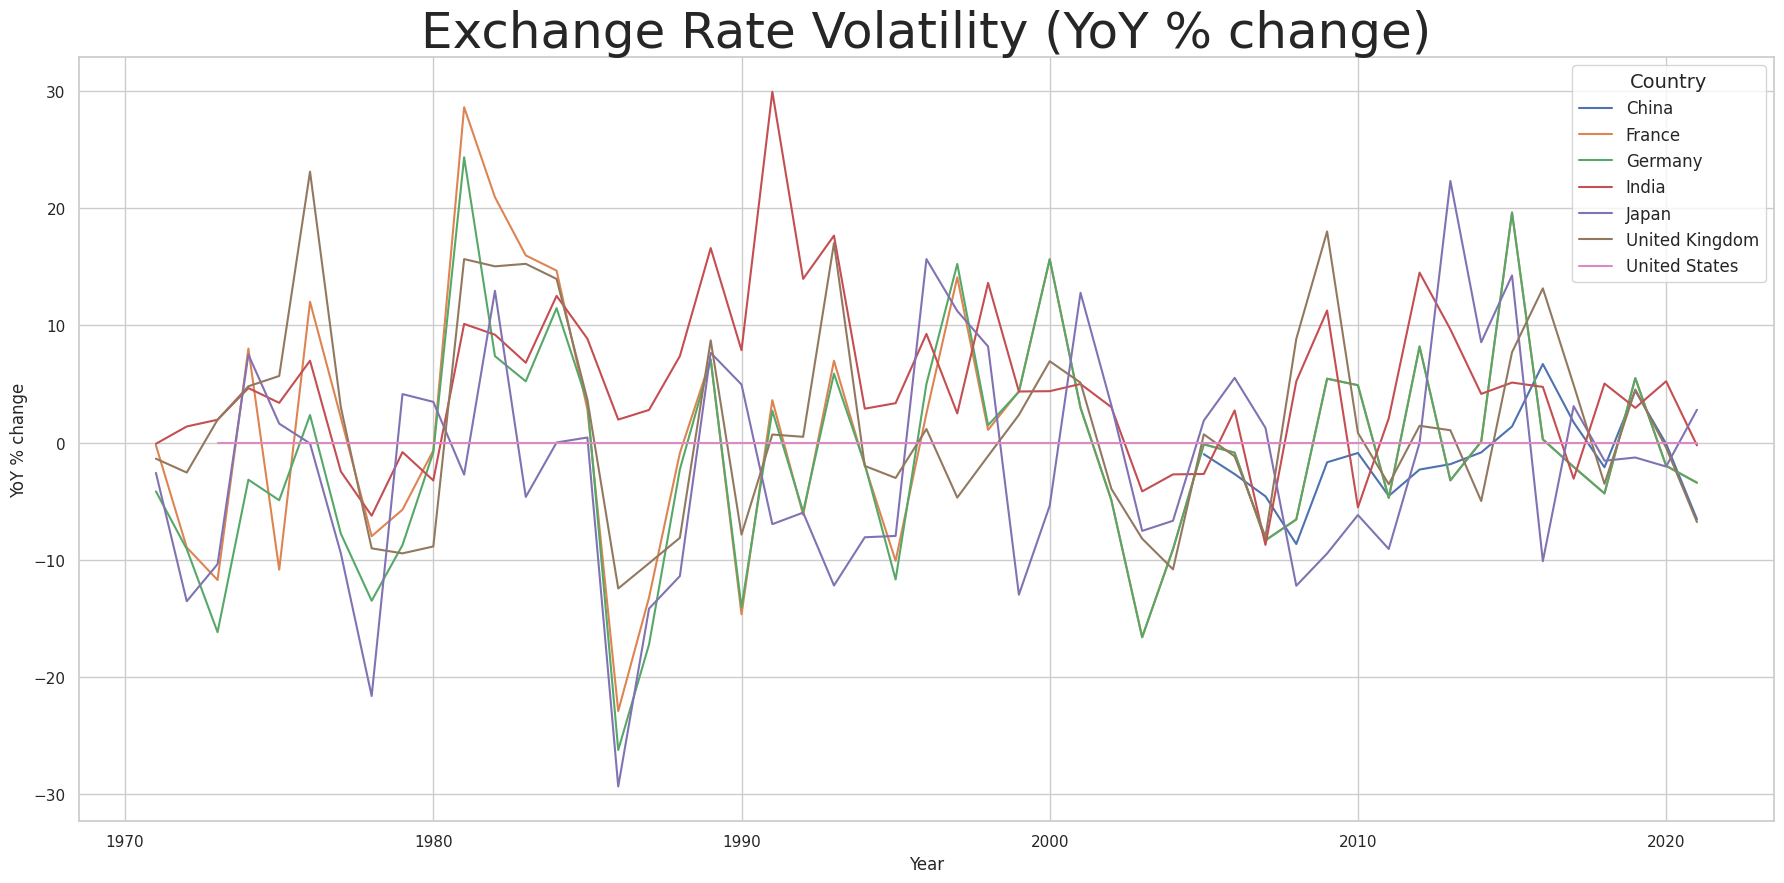

In [58]:
## Visualization of the Volatility for select countries (United States , China
# Germany , India , Japan , United Kingdom, France)

import matplotlib.pyplot as plt
import seaborn as sns


selected_countries = ['United States', 'China', 'Germany', 'India', 'Japan', 'United Kingdom', 'France']
subset = df[df['country'].isin(selected_countries)]

plt.figure(figsize=(18,9))
sns.lineplot(data=subset, x ='year', y = 'exchange_rate_change',hue='country')
plt.title('Exchange Rate Volatility (YoY % change)',fontsize = 36)
plt.xlabel('Year',fontsize =12)
plt.ylabel('YoY % change',fontsize = 12)
plt.legend(title='Country',fontsize=12,title_fontsize=14)
plt.tight_layout()
plt.show()

India shows frequent and wide fluctuations in exchange rate change, especially from the late 1980s to the 2000s.

This may indicate:

    Economic liberalization periods.

    Political and financial instability.

    Heavy dependence on imports and oil prices.

In [25]:
### 2. Impact of Foreign Exchange Rate change in the GDP and imports and exports of goods and services.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [26]:
df.columns

Index(['countryid', 'country', 'year', 'ama_exchange_rate',
       'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni',
       'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
       'changes_in_inventories', 'construction_(isic_f)',
       'exports_of_goods_and_services', 'final_consumption_expenditure',
       'general_government_final_consumption_expenditure',
       'gross_capital_formation',
       'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)',
       'household_consumption_expenditure_(including_non-profit_institutions_serving_households)',
       'imports_of_goods_and_services', 'manufacturing_(isic_d)',
       'mining,_manufacturing,_utilities_(isic_c-e)',
       'other_activities_(isic_j-p)', 'total_value_added',
       'transport,_storage_and_communication_(isic_i)',
       'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)',
       'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)',
     

In [27]:
## Filtering India data

india = df[df['country'].str.strip().str.lower()== 'india']
india = india.sort_values('year')

In [28]:
df['country']

,country
53,Albania
54,Albania
55,Albania
56,Albania
57,Albania
...,...
8829,Zimbabwe
8830,Zimbabwe
8831,Zimbabwe
8832,Zimbabwe


In [29]:
df[df['country']=='india']

,countryid,country,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,"agriculture,_hunting,_forestry,_fishing_(isic_a-b)",changes_in_inventories,...,imports_of_goods_and_services,manufacturing_(isic_d),"mining,_manufacturing,_utilities_(isic_c-e)",other_activities_(isic_j-p),total_value_added,"transport,_storage_and_communication_(isic_i)","wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)",gross_national_income(gni)_in_usd,gross_domestic_product_(gdp),exchange_rate_change


In [30]:
df.columns

Index(['countryid', 'country', 'year', 'ama_exchange_rate',
       'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni',
       'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
       'changes_in_inventories', 'construction_(isic_f)',
       'exports_of_goods_and_services', 'final_consumption_expenditure',
       'general_government_final_consumption_expenditure',
       'gross_capital_formation',
       'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)',
       'household_consumption_expenditure_(including_non-profit_institutions_serving_households)',
       'imports_of_goods_and_services', 'manufacturing_(isic_d)',
       'mining,_manufacturing,_utilities_(isic_c-e)',
       'other_activities_(isic_j-p)', 'total_value_added',
       'transport,_storage_and_communication_(isic_i)',
       'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)',
       'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)',
     

In [31]:
### Selecting relevant columns

india = india[['year','ama_exchange_rate',
               'gross_domestic_product_(gdp)',
               'exports_of_goods_and_services',
               'imports_of_goods_and_services']]

In [32]:
india

,year,ama_exchange_rate,gross_domestic_product_(gdp),exports_of_goods_and_services,imports_of_goods_and_services
4162,1971,7.491935,6.689848e+10,2.453305e+09,2.677546e+09
4163,1972,7.594468,7.274418e+10,2.929764e+09,2.698016e+09
4164,1973,7.742039,8.685136e+10,3.655368e+09,4.102279e+09
4165,1974,8.101603,9.797799e+10,4.733631e+09,5.898832e+09
4166,1975,8.375892,1.020000e+11,5.745060e+09,6.762265e+09
4167,1976,8.960413,1.020000e+11,6.851247e+09,6.265336e+09
4168,1977,8.738576,1.190000e+11,7.598492e+09,7.457737e+09
4169,1978,8.192840,1.380000e+11,8.684412e+09,9.060350e+09
4170,1979,8.125791,1.520000e+11,1.026362e+10,1.242218e+10
4171,1980,7.862945,1.870000e+11,1.148298e+10,1.729123e+10


In [33]:
## Rename the columns

india.columns = ['year','exchange_rate','gdp','exports','imports']

In [34]:
india = india.dropna()

In [35]:
india.head()

,year,exchange_rate,gdp,exports,imports
4162,1971,7.491935,6.689848e+10,2.453305e+09,2.677546e+09
4163,1972,7.594468,7.274418e+10,2.929764e+09,2.698016e+09
4164,1973,7.742039,8.685136e+10,3.655368e+09,4.102279e+09
4165,1974,8.101603,9.797799e+10,4.733631e+09,5.898832e+09
4166,1975,8.375892,1.020000e+11,5.745060e+09,6.762265e+09


## **GRAPHS TO VISUALZIZE THE TRENDS**
Change in exchange rates , gdp, exports and imports over the years .


<Figure size 8000x4000 with 0 Axes>

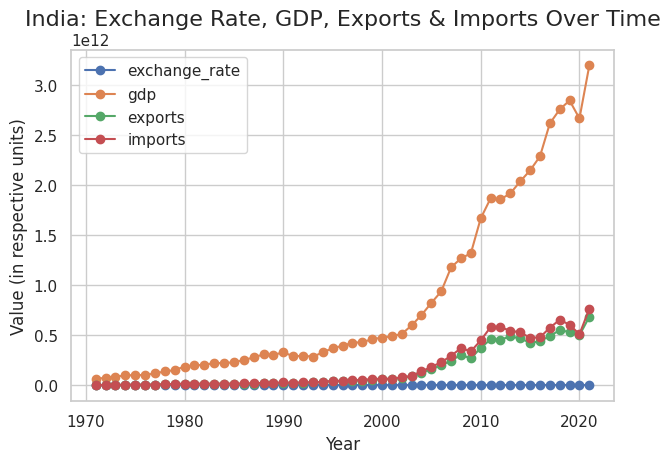

In [36]:
sns.set(style ="whitegrid")

columns_in_use = ['year','exchange_rate','gdp','exports','imports']

india_data = india[columns_in_use]

india_data.set_index("year",inplace=True)

plt.figure(figsize=(80,40))
india_data.plot(marker='o')
plt.title("India: Exchange Rate, GDP, Exports & Imports Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Value (in respective units)")
plt.grid(True)
plt.tight_layout()
plt.show()

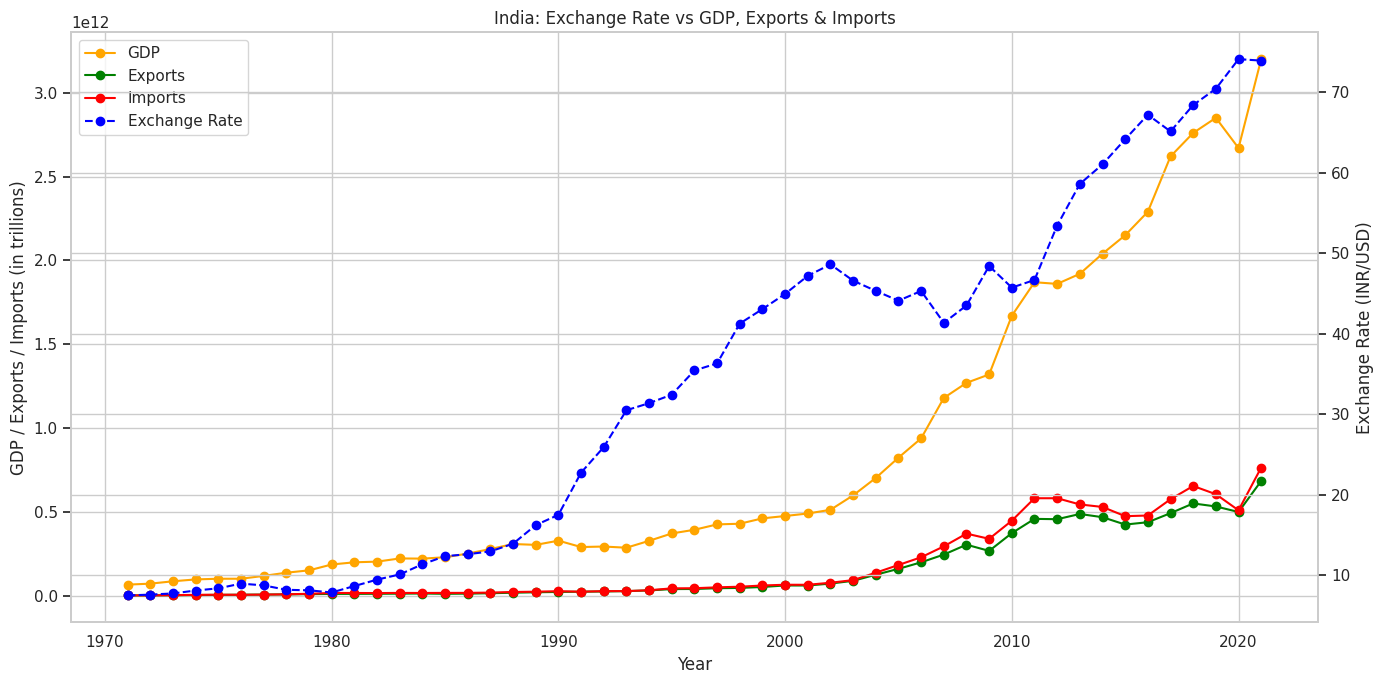

In [37]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# GDP, Exports, Imports on primary axis
ax1.plot(india_data.index, india_data['gdp'], label='GDP', color='orange', marker='o')
ax1.plot(india_data.index, india_data['exports'], label='Exports', color='green', marker='o')
ax1.plot(india_data.index, india_data['imports'], label='Imports', color='red', marker='o')
ax1.set_ylabel('GDP / Exports / Imports (in trillions)')
ax1.set_xlabel('Year')
ax1.grid(True)

# Create secondary axis
ax2 = ax1.twinx()
ax2.plot(india_data.index, india_data['exchange_rate'], label='Exchange Rate', color='blue', linestyle='--', marker='o')
ax2.set_ylabel('Exchange Rate (INR/USD)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("India: Exchange Rate vs GDP, Exports & Imports")
plt.tight_layout()
plt.show()


To investigate if a weaker Indian Rupee (i.e., higher exchange rate) reduces imports.

In [40]:

india_df = df[df['country']=='India']
india_df = india_df[['year','ama_exchange_rate','imports_of_goods_and_services']].dropna()

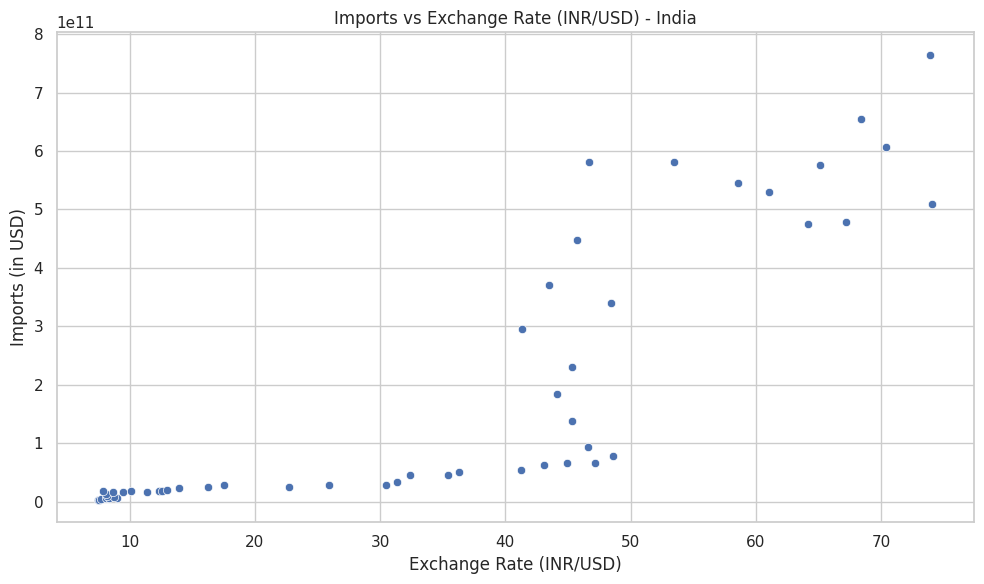

In [45]:


plt.figure(figsize=(10,6))
sns.scatterplot(data=india_df, x = 'ama_exchange_rate', y = 'imports_of_goods_and_services')
plt.title('Imports vs Exchange Rate (INR/USD) - India')
plt.xlabel('Exchange Rate (INR/USD)')
plt.ylabel('Imports (in USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['countryid', 'country', 'year', 'ama_exchange_rate',
       'imf_based_exchange_rate', 'population', 'currency', 'per_capita_gni',
       'agriculture,_hunting,_forestry,_fishing_(isic_a-b)',
       'changes_in_inventories', 'construction_(isic_f)',
       'exports_of_goods_and_services', 'final_consumption_expenditure',
       'general_government_final_consumption_expenditure',
       'gross_capital_formation',
       'gross_fixed_capital_formation_(including_acquisitions_less_disposals_of_valuables)',
       'household_consumption_expenditure_(including_non-profit_institutions_serving_households)',
       'imports_of_goods_and_services', 'manufacturing_(isic_d)',
       'mining,_manufacturing,_utilities_(isic_c-e)',
       'other_activities_(isic_j-p)', 'total_value_added',
       'transport,_storage_and_communication_(isic_i)',
       'wholesale,_retail_trade,_restaurants_and_hotels_(isic_g-h)',
       'gross_national_income(gni)_in_usd', 'gross_domestic_product_(gdp)',
     

CORRELATION


In [47]:
correlation = india_df['ama_exchange_rate'].corr(india_df['imports_of_goods_and_services'])
print(f"Correlation coefficient : {correlation:.2f}")

Correlation coefficient : 0.85


Correlation coefficient : 0.85

In [50]:
#### LINEAR REGRESSION
import statsmodels.api as sm
X = india_df['ama_exchange_rate']
y= india_df['imports_of_goods_and_services']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     imports_of_goods_and_services   R-squared:                       0.718
Model:                                       OLS   Adj. R-squared:                  0.713
Method:                            Least Squares   F-statistic:                     124.9
Date:                           Thu, 22 May 2025   Prob (F-statistic):           4.40e-15
Time:                                   11:44:00   Log-Likelihood:                -1374.3
No. Observations:                             51   AIC:                             2753.
Df Residuals:                                 49   BIC:                             2756.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

Summary:

    The model shows a positive relationship between exchange rate and imports.

    That is: as INR weakens, imports rise (₹9,016 crore per ₹1 increase).

    Real-world takeaway: India's imports might be less sensitive to currency depreciation than theory predicts.

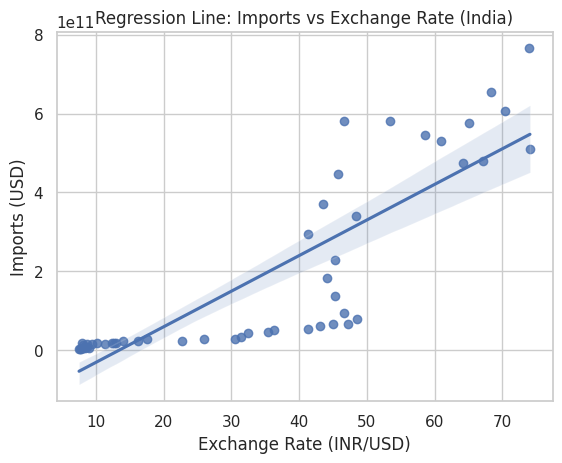

In [52]:
## Plotting Regression line

sns.regplot(x='ama_exchange_rate',y='imports_of_goods_and_services',data =india_df)
plt.title('Regression Line: Imports vs Exchange Rate (India)')
plt.xlabel('Exchange Rate (INR/USD)')
plt.ylabel('Imports (USD)')
plt.show()

SUMMARY :

- The regression line shown here shows a positive slope or upward slope .
- It suggests that as the INR weakens , India's imports increase.

Contrary to common theory :

- Normally , we expect that Inr weakening could hamper the value of goods and servcies being imported as they become expensive .

Reason for a positive correlation :

- Inelastic Imports : India heavily imports oil, gold, electronics — goods we can't stop buying easily.

- Economic Growth: Over time, India's economy grew, increasing import demand despite weaker INR.
-
Data Skew: If data spans many decades, macroeconomic factors like inflation or global trade trends can dominate.